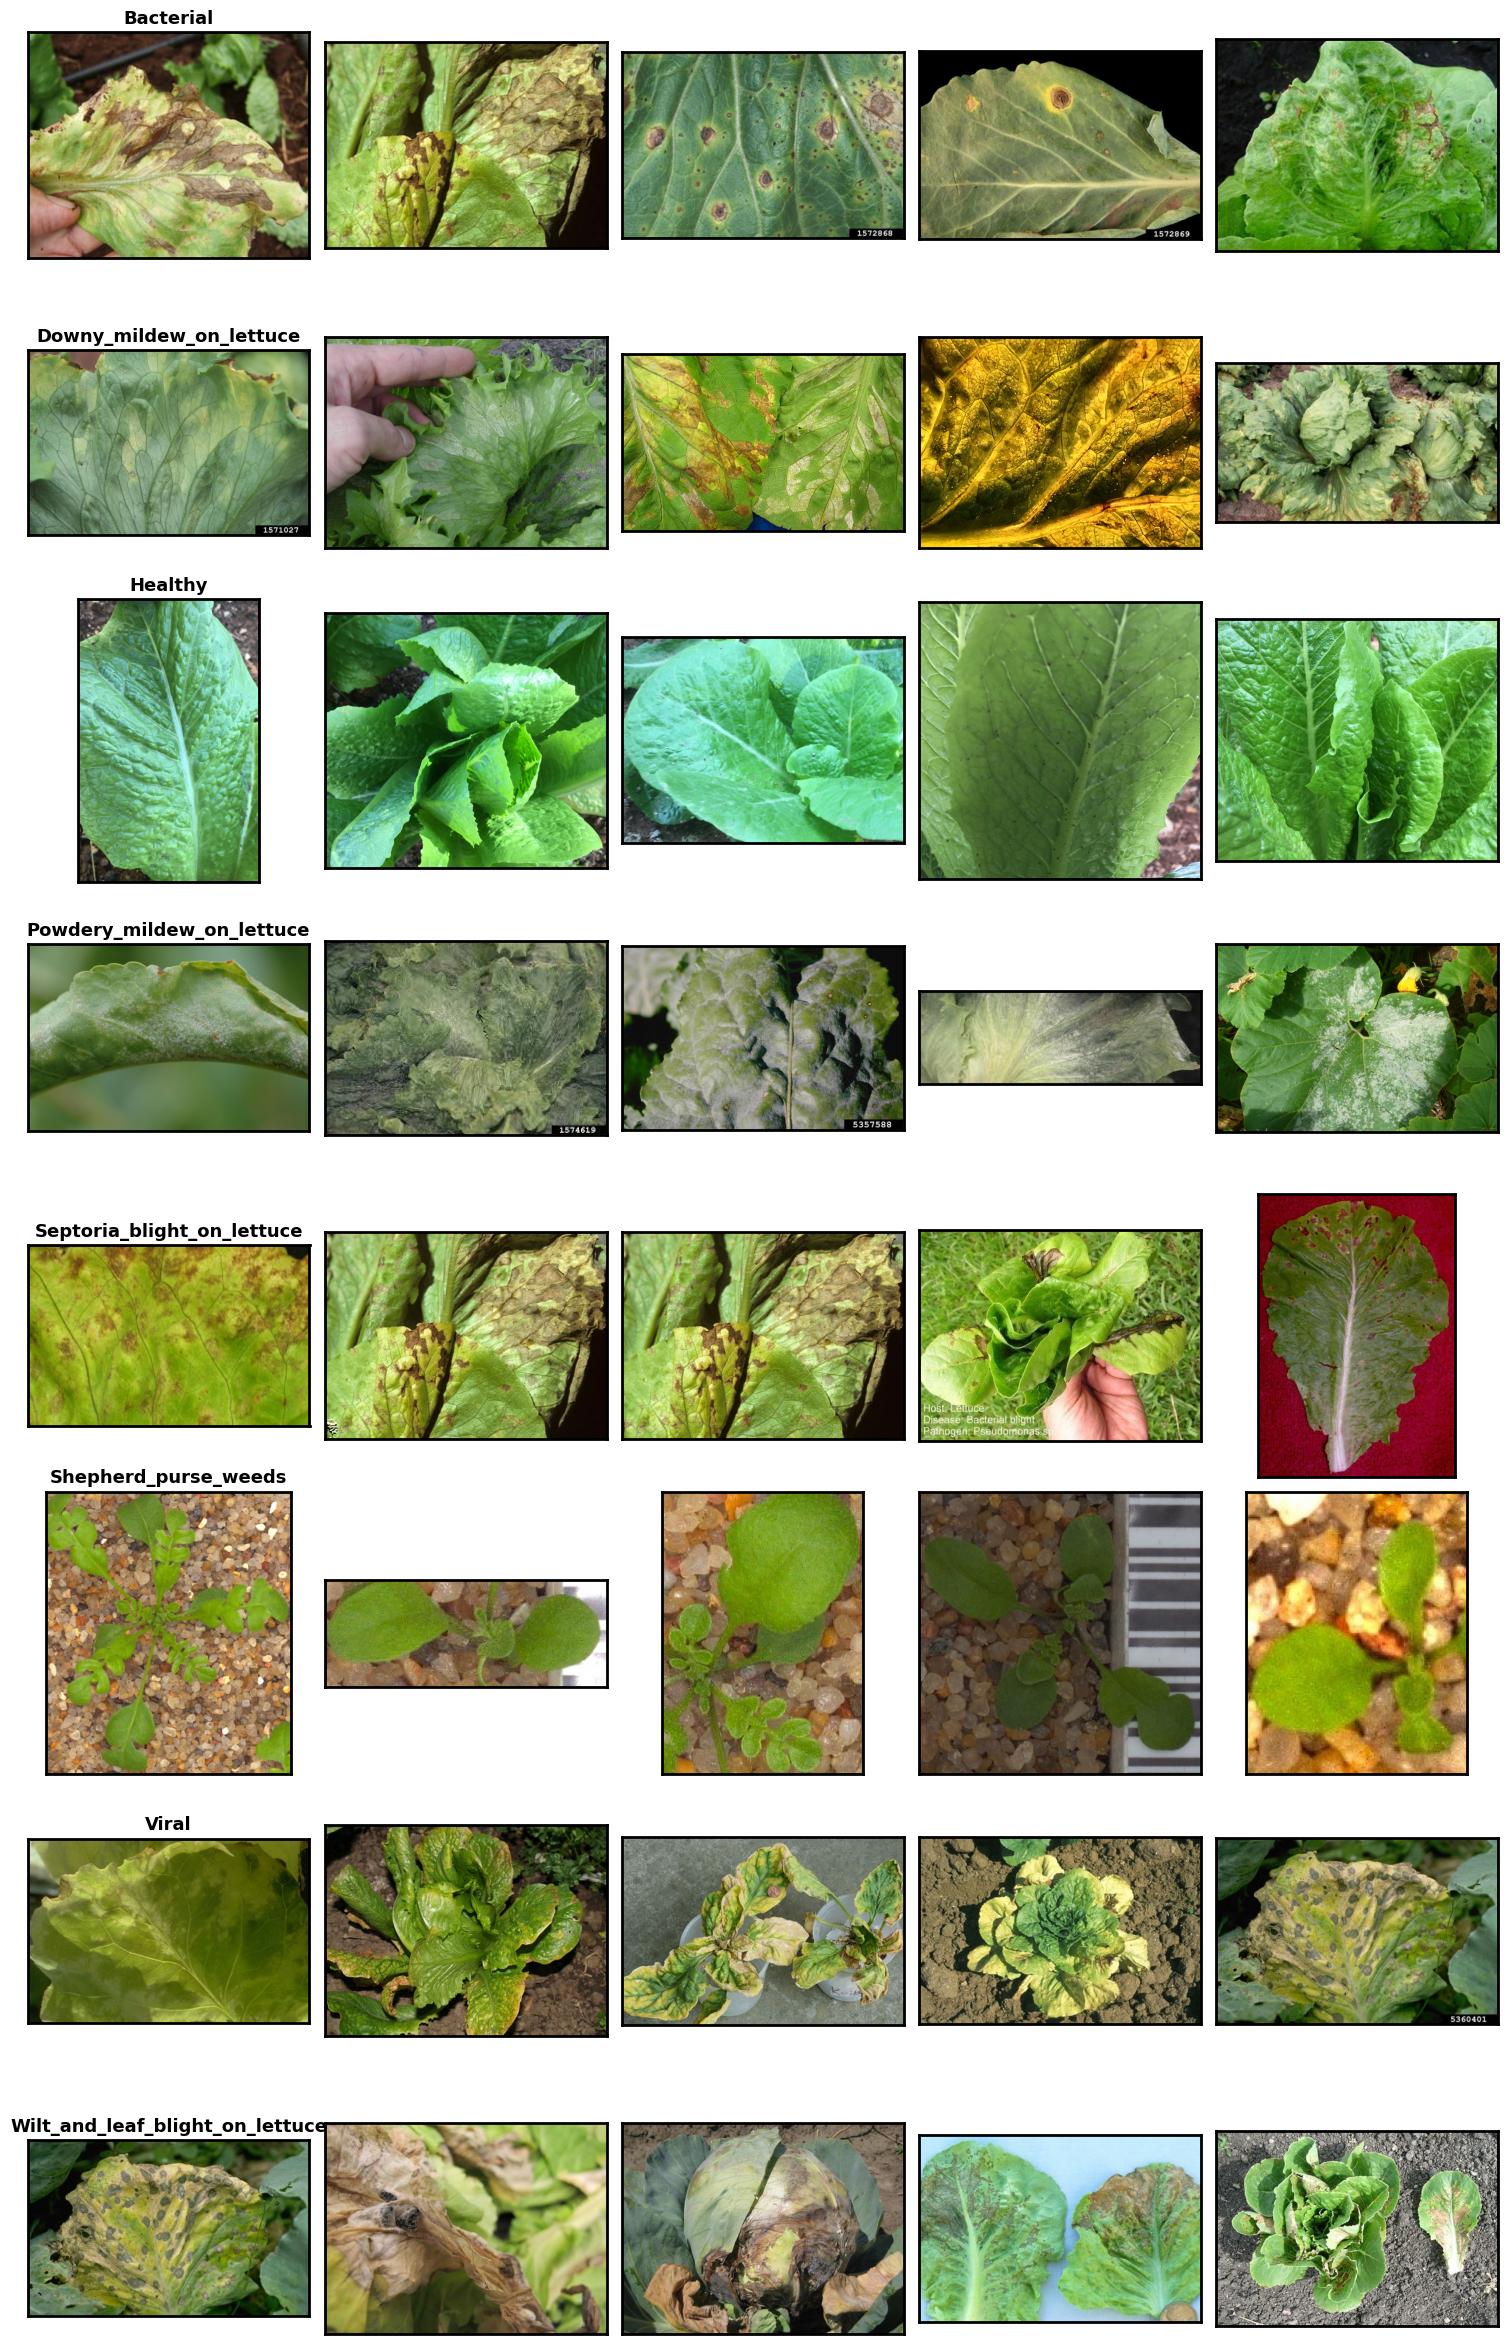

In [3]:
import os
import matplotlib.pyplot as plt
import random


def plot_class_samples(dataset_dir, n_images=5):

    class_folders = [
        d
        for d in os.listdir(dataset_dir)
        if os.path.isdir(os.path.join(dataset_dir, d))
    ]
    class_folders.sort()

    n_classes = len(class_folders)

    fig, axes = plt.subplots(n_classes, n_images, figsize=(n_images * 3, n_classes * 3))

    for row, class_name in enumerate(class_folders):

        class_path = os.path.join(dataset_dir, class_name)

        images = [
            f
            for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f))
        ]

        sample_imgs = random.sample(images, min(n_images, len(images)))

        for col in range(n_images):

            ax = axes[row, col] if n_classes > 1 else axes[col]

            ax.set_xticks([])

            ax.set_yticks([])

            # Draw border for clarity

            for spine in ax.spines.values():

                spine.set_edgecolor("black")

                spine.set_linewidth(2)

            if col < len(sample_imgs):

                img_path = os.path.join(class_path, sample_imgs[col])

                img = plt.imread(img_path)

                ax.imshow(img)

                if col == 0:

                    ax.set_title(f"{class_name}", fontsize=13, fontweight="bold")

            else:

                ax.axis("off")

    plt.tight_layout()

    plt.show()


# Example usage:
plot_class_samples(
    r"F:\Lettuce_leaf_classification\Lettuce_disease_datasets", n_images=5
)

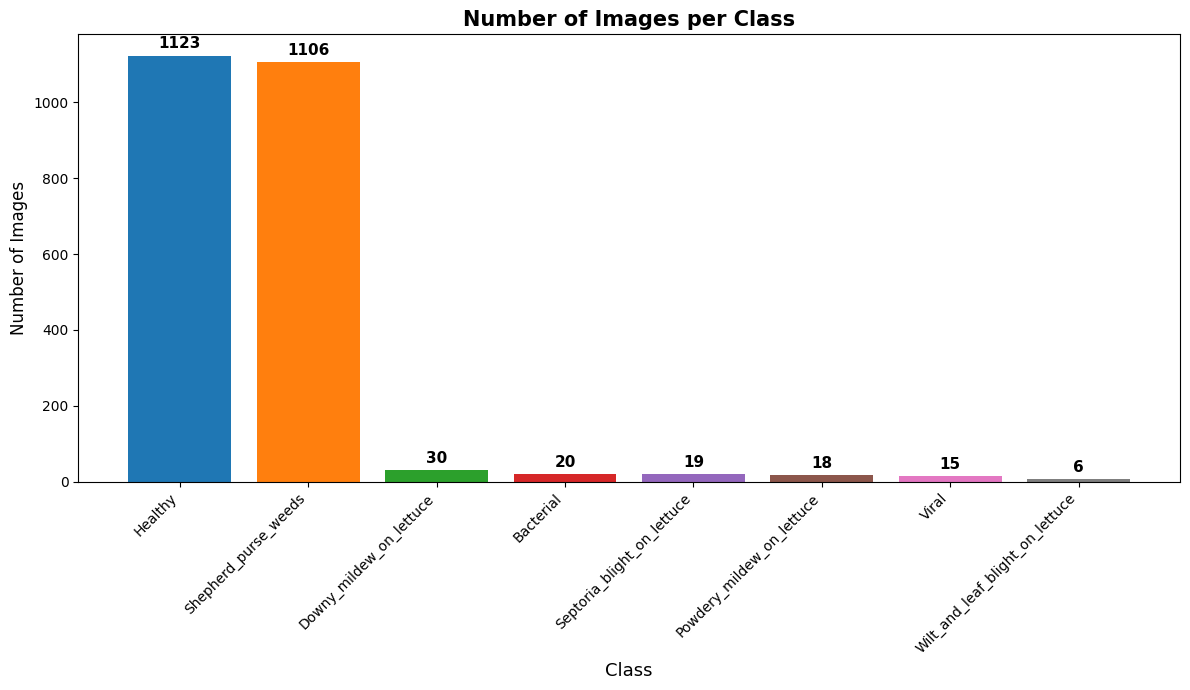

Class  Image Count
0                          Healthy         1123
1             Shepherd_purse_weeds         1106
2          Downy_mildew_on_lettuce           30
3                        Bacterial           20
4       Septoria_blight_on_lettuce           19
5        Powdery_mildew_on_lettuce           18
6                            Viral           15
7  Wilt_and_leaf_blight_on_lettuce            6

In [4]:
import os
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


from IPython.display import display, Markdown


def plot_image_counts(dataset_dir):
    """








    Visualize the number of images in each class folder as a barplot (descending order),








    and display a DataFrame with the counts. Adds count labels on bars.
    """

    class_folders = [
        d
        for d in os.listdir(dataset_dir)
        if os.path.isdir(os.path.join(dataset_dir, d))
    ]
    class_folders.sort()

    counts = []

    for class_name in class_folders:

        class_path = os.path.join(dataset_dir, class_name)
        n_images = len(
            [
                f
                for f in os.listdir(class_path)
                if os.path.isfile(os.path.join(class_path, f))
            ]
        )
        counts.append(n_images)

    # Create DataFrame and sort descending

    df = pd.DataFrame({"Class": class_folders, "Image Count": counts})

    df = df.sort_values("Image Count", ascending=False).reset_index(drop=True)

    # Plot

    plt.figure(figsize=(12, 7))

    palette = sns.color_palette("tab10", n_colors=len(df))

    bars = plt.bar(df["Class"], df["Image Count"], color=palette)

    plt.xlabel("Class", fontsize=13)

    plt.ylabel("Number of Images", fontsize=12)

    plt.title("Number of Images per Class", fontsize=15, fontweight="bold")

    plt.xticks(rotation=45, ha="right")

    # Add count labels on top of bars

    for bar in bars:
        height = bar.get_height()
        plt.annotate(
            f"{int(height)}",
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
            fontsize=11,
            fontweight="bold",
        )

    plt.tight_layout()

    plt.show()

    display(df)


# Example usage:


plot_image_counts(r"F:\Lettuce_leaf_classification\Lettuce_disease_datasets")

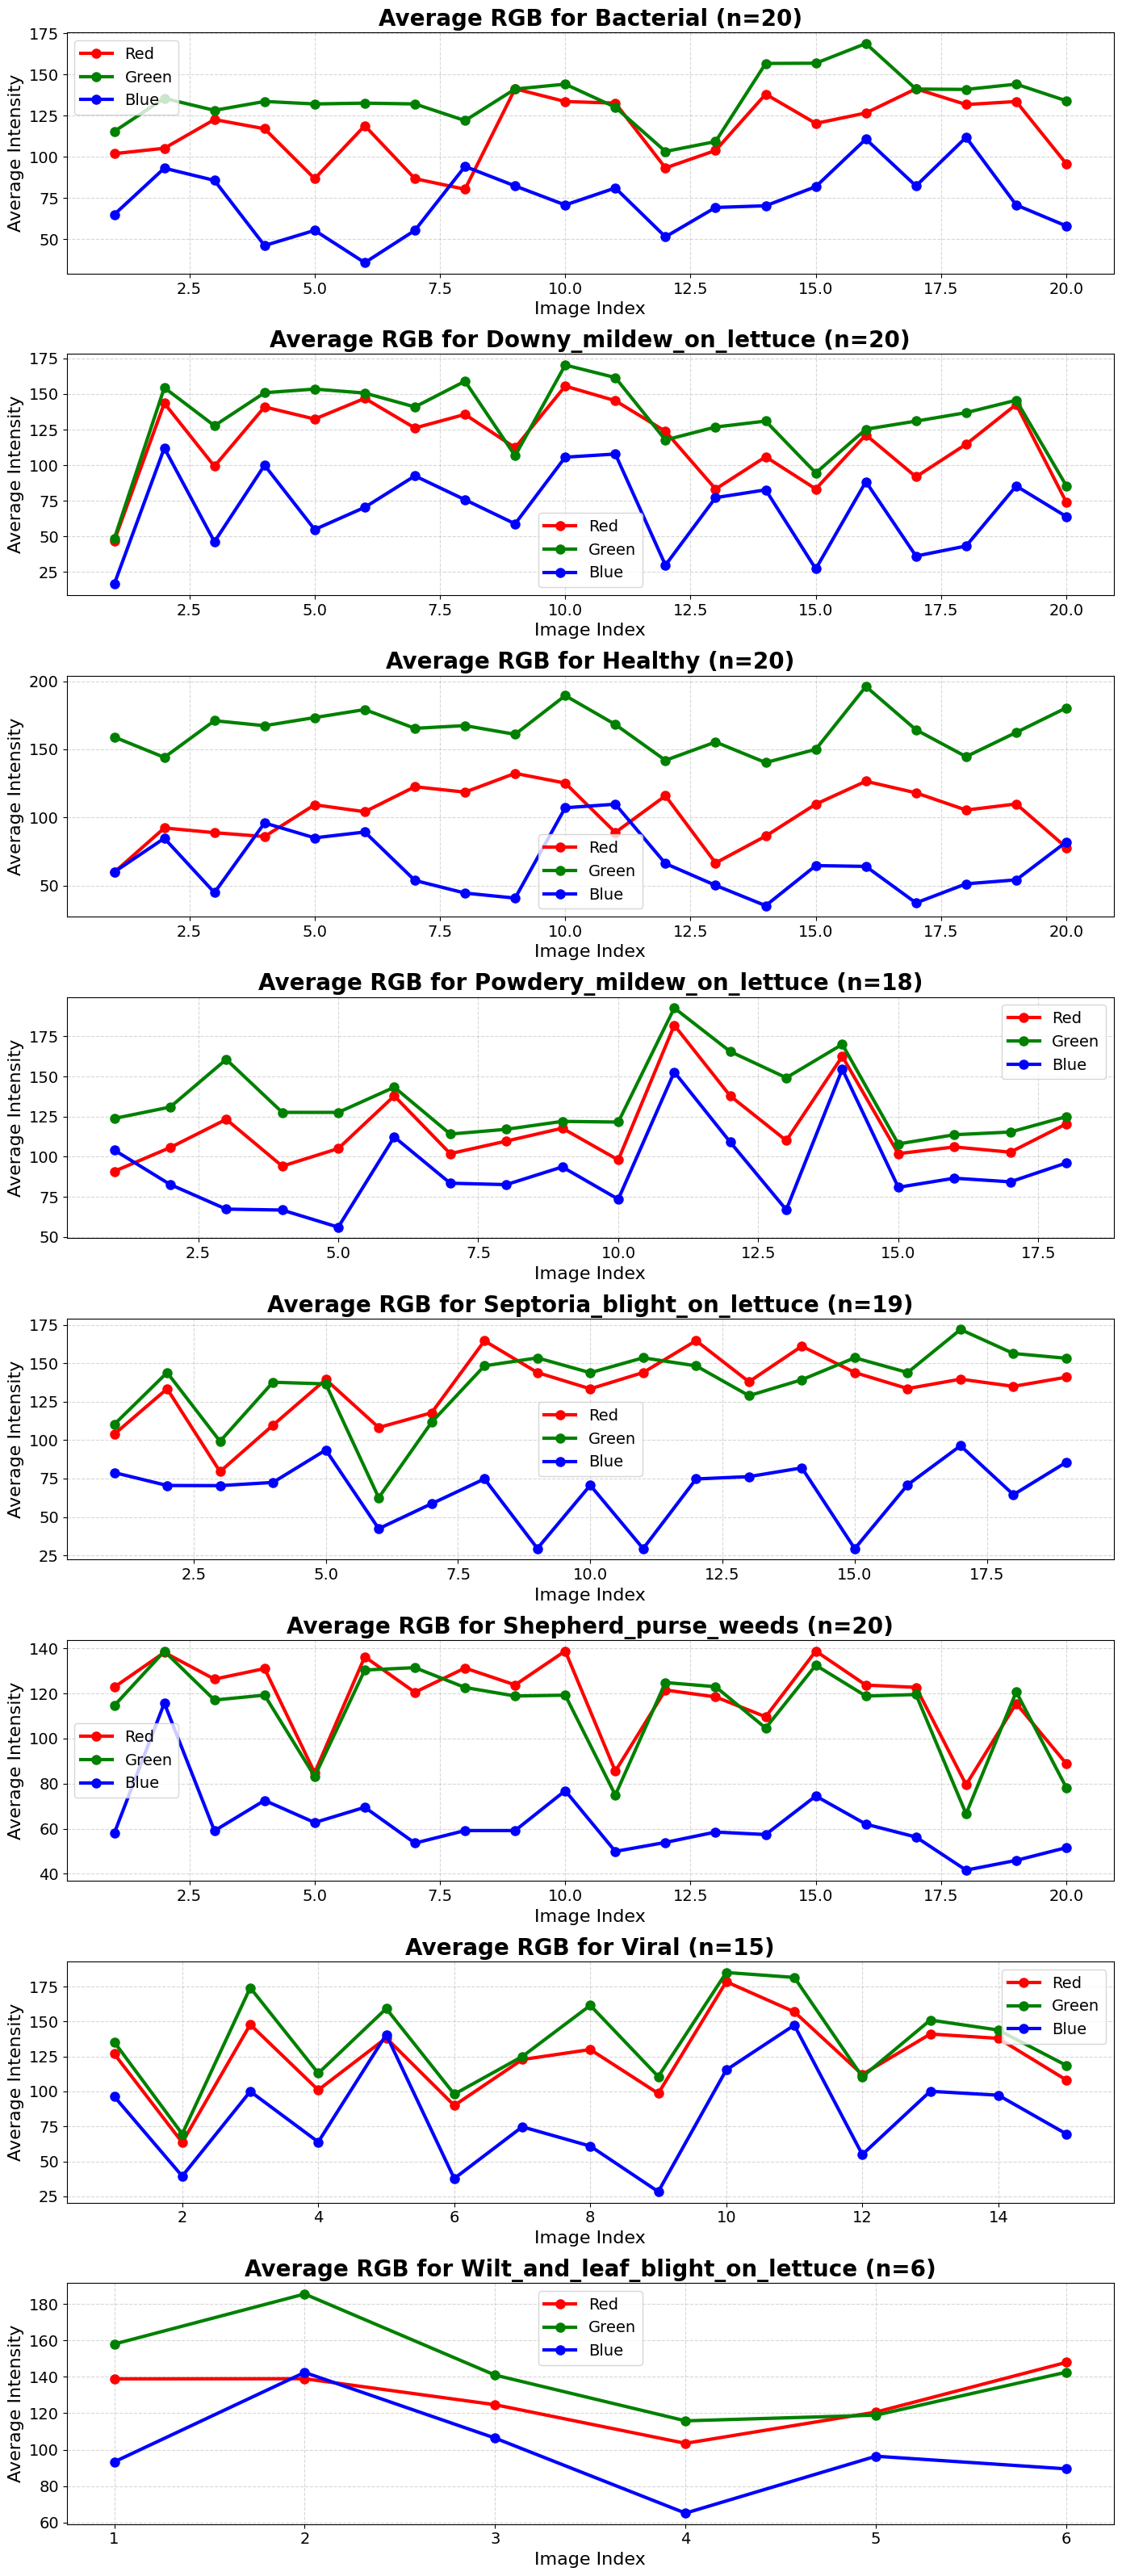

In [10]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


def compute_avg_rgb(images):
    avg_r, avg_g, avg_b = [], [], []
    for img_path in images:
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, (224, 224))
        b, g, r = cv2.split(img)
        avg_r.append(np.mean(r))
        avg_g.append(np.mean(g))
        avg_b.append(np.mean(b))
    return avg_r, avg_g, avg_b


# Path to dataset
dataset_path = r"F:\Lettuce_leaf_classification\Lettuce_disease_datasets"
class_folders = [
    d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))
]
class_folders.sort()

# Prepare data for subplots
n_classes = len(class_folders)
fig, axes = plt.subplots(n_classes, 1, figsize=(14, 4 * n_classes), sharex=False)
if n_classes == 1:
    axes = [axes]

for idx, cls in enumerate(class_folders):
    class_path = os.path.join(dataset_path, cls)
    img_files = [
        os.path.join(class_path, f)
        for f in os.listdir(class_path)
        if os.path.isfile(os.path.join(class_path, f))
    ]
    sample_imgs = img_files if len(img_files) <= 20 else random.sample(img_files, 20)
    r_vals, g_vals, b_vals = compute_avg_rgb(sample_imgs)
    ax = axes[idx]
    x = list(range(1, len(sample_imgs) + 1))
    ax.plot(x, r_vals, color="red", marker="o", linewidth=3, markersize=8, label="Red")
    ax.plot(
        x, g_vals, color="green", marker="o", linewidth=3, markersize=8, label="Green"
    )
    ax.plot(
        x, b_vals, color="blue", marker="o", linewidth=3, markersize=8, label="Blue"
    )
    ax.set_title(
        f"Average RGB for {cls} (n={len(sample_imgs)})", fontsize=20, fontweight="bold"
    )
    ax.set_xlabel("Image Index", fontsize=16)
    ax.set_ylabel("Average Intensity", fontsize=16)
    ax.legend(fontsize=14)
    ax.tick_params(axis="both", labelsize=14)
    ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()